# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Instalação

Seaborn é uma biblioteca de visualização de dados Python baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

Se você tem o Anaconda instalado, você provavelmente já possui a biblioteca instalada.

Para checar se você já tem, no Jupyter Notebook ou interpretador do python, rode:

In [2]:
import seaborn as sns

Se não der erro, é porque está tudo ok!

Caso você tenha um erro, será necessário instalar. Para isso, rode o comando no prompt/terminal que possua acesso ao comando:




In [ ]:
pip install seaborn 

Em caso de problemas nessa parte, entre em contato no chat da sua turma ou no Q&A.

## Importando

Para utilizar o seaborn, precisamos importar a biblioteca:


In [ ]:
import seaborn as sns

## Seaborn x matplotlib

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [ ]:
y

In [ ]:
# Plot the data with Matplotlib defaults
plt.style.use('classic')
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
# mesmo código utilizado acima!
sns.set()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [ ]:
# Importar dados do arquivo titanic.csv
df = pd.read_csv("data/titanic.csv")

In [ ]:
# Usar .info() e .describe() para olhar os dados
df.info()

In [ ]:
df.describe(include='all')

## API

Sendo uma biblioteca construída como uma casa envolta do matplotlib, tudo que aprendemos sobre matplotlib se aplica aqui em termos de conceitos (Figure, Axes, labels dos eixos, etc). Porém, o seaborn abstrai para o usuário da biblioteca algumas complexidades, tendo uma excelente integração com DataFrames do pandas.
<br>
A biblioteca do seaborn fornece vários tipos de visualização

<img src="images/function_overview_8_0.png"  style="width: 400px" />

### distplot()
O distplot plota a distribuição de uma única variável numérica.

In [ ]:
sns.distplot(df['Age']);

#### Entendendo o gráfico:

Para entendermos melhor esse gráfico, precisamos entender um pouquinho o que é _KDE_, abreviação de _Kernel Density Estimation_, que traduzido seria Estimativa de densidade kernel:

    Em Estatística, estimativa de densidade por Kernel (EDK) é uma forma não-paramétrica para estimar a Função densidade de probabilidade (FDP) de uma variável aleatória. Estimativa da densidade por Kernel é um problema fundamental de suavização de dados onde inferências sobre a população são feitas com base em uma amostra de dados finita.

De forma bem simplificada então, juntando os dois conceitos, podemos pensar que o gráfico de linha KDE é basicamente a soma das várias gaussianas envolta de cada ponto individual. Quando mais gaussianas se sobrepõe, maior a soma e portanto maior o pico da função KDE.

A imagem abaixo ilustra bem:
<img src="images/distplot.png" style="width: 500px" />


### barplot()
Utilizado em análise com variáveis categóricas no eixo x e numéricas em y. Para a variável numérica o sns.barplot calcula a média do valor em y

In [ ]:
# bar plot de 'Survived' como variável categórica em x pela variável numérica 'Fare' em y
sns.barplot(y='Fare', x='Survived', data = df);

Pelo gráfico concluímos que quem mais pagou para embarcar teve mais chances de sobreviver.

Para demonstrar que o `sns.barplot` calcula a média no eixo y podemos fazer um groupby na coluna 'Survived' calculando a média na coluna 'Fare':

In [ ]:
df.groupby(['Survived'])['Fare'].mean()

Podemos adicionar uma dimensão a mais no nosso gráfico atribuindo cores diferentes para 'Sex' através do argumento `hue`

In [ ]:
sns.barplot(y='Fare', x='Survived', data = df, hue='Sex')

### countplot()
É essencialmente o mesmo que o barplot, mas ele realiza a contagem do número de ocorrências da variável categórica. Nesse caso só passamos a variável x como argumento.

In [ ]:
# countplot da variável 'Survived' com as cores dadas pela coluna 'Sex'
sns.countplot(x='Survived', data=df, hue='Sex');

### boxplot()
boxplots mostram a distribuição de dados categóricos. Esse método facilita a identificação visual de outliers. <br>

Elementos de um boxplot:
   * 1º quartil (Q1): 25% percentil <br>
   * 3º quartil (Q3): 75% percentil <br>
   * Intervalo Interquartílico (IQR): distância entre 3º e 1º quartil (IQR = Q3 − Q1) <br>
   * Mediana: representa o meio da distribuição (50% percentil) <br>
   * Mínimo dentro do intervalo: valor mínimo dentro do dataset excluindo as anomalias (Q1 − 1.5 × IQR) <br>
   * Máximo dentro do intervalo: valor máximo dentro do dataset excluindo as anomalias (Q3 + 1.5 × IQR) <br>
   * Outliers ou Anomalias: observações extremas do dataset, qualquer ponto fora das barras  <br>

<img src="images/ML12.png" style="width: 500px" />

In [ ]:
# boxplot de Pclass por Fare com as cores dadas por Survived
plt.figure(figsize=(15,8))
sns.boxplot(x="Pclass", y="Fare", data=df, palette='rainbow', hue='Survived')
# plt.ylim([0,300])

Outras formas de visualização stripplot, violinplot, swarmplot.

### Scatterplot
Mostra a relação entre duas variáveis numéricas podendo adicionar uma categórica na cor.

In [ ]:
# Scatter plot de 'Age' por 'Fare' diferenciando as cores por 'Survived'
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived');

Podemos realizar transformações nos dados para tentar visualizar melhor a relação entre as variáveis. Nesse caso 'Fare' tem uma variabilidade maior que 'Age'. Vamos tirar o np.log de Fare e plotar esse gráfico novamente.

In [ ]:
df['Fare_log'] = np.log(df.Fare)

In [ ]:
sns.scatterplot(x='Age', y='Fare_log', data=df, hue='Survived')
plt.xticks(rotation=90);

Podemos ver que na parte superior do gráfico onde o Fare é maior temos mais pontos com Survived que na parte inferior. O mesmo acontece para idades até 10 anos.

### jointplot()
Segue o mesmo princípio do scatterplot, mas adiciona gráficos de distribuição nos eixos.

In [ ]:
sns.jointplot(x ="Age", y ="Fare", data = df);

### Pairplot()
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

In [ ]:
sns.pairplot(df.drop(['Fare_log','PassengerId'], axis=1), hue='Survived');

### Lineplot
Cria gráficos de linha entre variáveis. Muito útil quando queremos ver dados no tempo.

In [ ]:
# line plot de Pclass em x por Survived em y diferenciando as cores por Sex
sns.lineplot(x='Pclass', y='Survived', data=df, hue='Sex');

## Matriz

O principal gráfico em termos de matriz é o heatmap ou mapa de calor.

Podemos utilizar o método `corr()` que calcula a correlação linear (por padrão, de <a href="https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson">Pearson</a>) entre as variáveis contínuas do nosso DataFrame e retorna uma matriz numérica com os valores dessa correlação.

In [ ]:
sns.heatmap(df.corr());

Onde __1__ quer dizer **correlação perfeita**, e __zero nenhuma correlação linear__, e __-1 correlação negativa perfeita__ (quando uma aumenta, outra diminui).

Para facilitar a visualização, podemos mudar o esquema de cores para o coolwarm ou quente/frio e mostrar os valores:


In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

### Subplots
Se quisessemos vários gráficos em uma mesma imagem podemos usar o método subplot.

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
fig.suptitle('2 x 2 subplots', fontsize=20)
axes[0,0].text(0.45, 0.5, str(('[0,0]')), fontsize=16)
axes[0,1].text(0.45, 0.5, str(('[0,1]')), fontsize=16)
axes[1,0].text(0.45, 0.5, str(('[1,0]')), fontsize=16)
axes[1,1].text(0.45, 0.5, str(('[1,1]')), fontsize=16);

In [ ]:
# Vamos criar quartis para 'Fare' utilizando a função pd.qcut
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

Essa função pd.qcut distribui os valores em quantidades aproximadamente iguais entre os bins. Podemos validar aplicando a função .value_counts() na coluna criada de ranges de Fare

In [ ]:
df['Fare_Range'].value_counts()

Agora vamos criar os subplots com dois gráficos: <br>
* Pclass em x por Survived em y
* Range de Fare em x por Survived em y

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Horizontally stacked subplots')
sns.barplot(y="Survived", x= "Pclass", data=df, ax=axes[0])
sns.barplot(y="Survived", x= "Fare_Range", data=df, ax=axes[1]);

O matplotlib permite você mudar praticamente tudo em um gráfico. Por exemplo:
* determinar a cor de cada categoria
* eliminar os eixos e labels
* adicionar grids
* trocar os textos, a fonte e o tamanho de labels e títulos
* adicionar linhas verticais e horizontais
* adicionar caixas de textos em locais específicos do gráfico
* juntar os eixos de dois gráficos em um subplot
* plotar dois gráficos com eixos distintos
* plotar mapas
* rotacionar os stickers

## Estilos e Cores

As duas funções mais valiosas para estilo com seaborn:

    set_style: darkgrid, whitegrid, dark, white, ticks
    set_context: paper, notebook, talk ou poster

A primeira é majoritariamente para mudar as cores, enquanto a segunda tem uma característica importante: facilitar a visualização para diferentes contextos.

Exemplo, para um poster, geralmente deseja-se letras maiores:


In [ ]:
sns.set_context('poster')
sns.countplot(x='Sex', data=df);

## Referências

A principal e mais útil referência que posso citar é a documentação do próprio seaborn. Ela é incrivelmente boa, acima da média comparada a todas as bibliotecas que vimos até então.

<a href="https://seaborn.pydata.org/index.html">Documentação</a> <br>
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=rJctnLc9LV0Q

## Exercícios

Utilizando o dataset **tips** do seaborn responda as questões abaixo: <br>
sns.load_dataset('tips')

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


a. Utilize os métodos para entender melhor o dataset

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


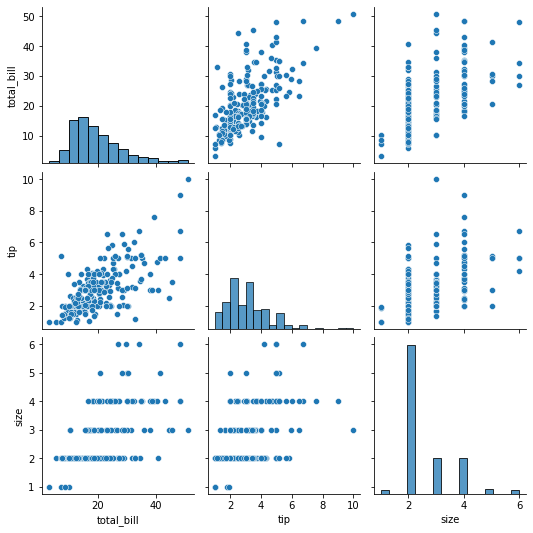

In [4]:
sns.pairplot(df);

b. Como você avaliaria graficamente a relação entre total_bill e tip?

<AxesSubplot:>

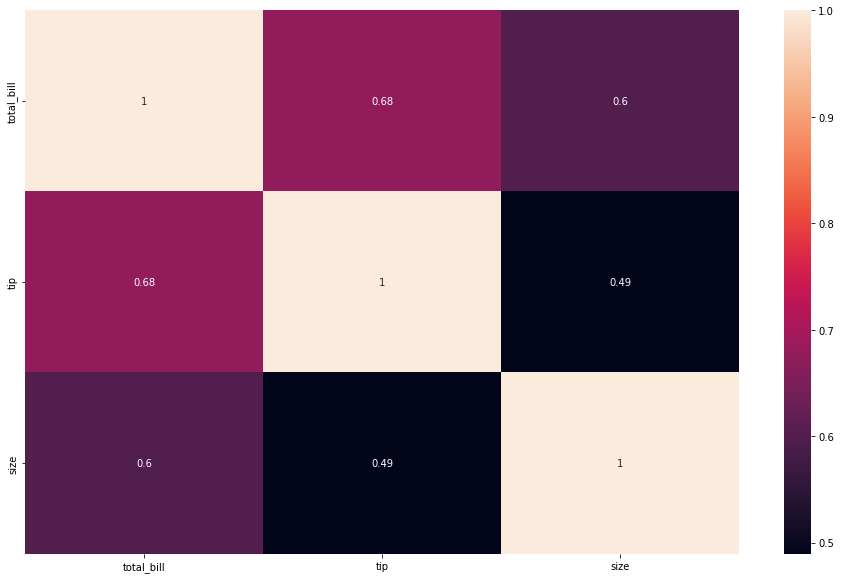

In [8]:
# para facilitar a visualização dessa correlação podemos criar um gráfico usando o método heatmap seaborn
# no quai vai aparacer o valor de cada um das correlações dentro dos quadrados.

# 1- gerando a correlação
correlação = df.corr()

#2- Gerando mapa heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data=correlação, annot=True)

c. Existe diferença no pagamento de gorjetas feito por mulheres e homens? E no pagamento total da conta?

Sim, o valor das gorjetas e da conta é maior para os homens. 

In [26]:
df.groupby(['sex']).apply(lambda x: x.mean())

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


<AxesSubplot:ylabel='tip'>

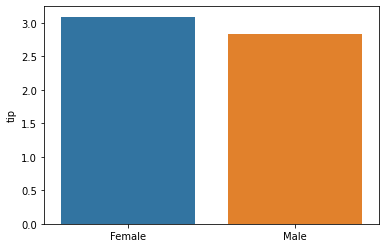

In [30]:
sns.barplot(y=df.groupby(['sex'])['tip'].apply(lambda x: x.mean()), x=df.sex.unique(), data = df)

<AxesSubplot:ylabel='total_bill'>

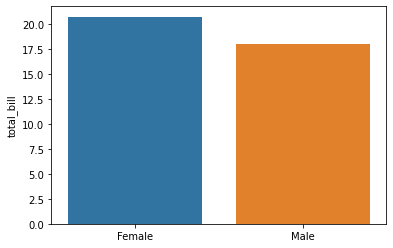

In [31]:
sns.barplot(y=df.groupby(['sex'])['total_bill'].apply(lambda x: x.mean()), x=df.sex.unique(), data = df)

d. Existe diferença no pagamento de gorjetas entre almoço e janta? E no pagamento total da conta?

Sim, as gorjetas e o total da conta são maiores no jantar.

In [13]:
df.groupby(['time']).apply(lambda x: x.mean())

,total_bill,tip,size
time,,,
Lunch,17.168676,2.728088,2.411765
Dinner,20.797159,3.102670,2.630682


<AxesSubplot:ylabel='total_bill'>

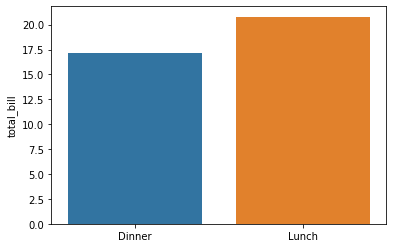

In [33]:
sns.barplot(y=df.groupby(['time'])['total_bill'].apply(lambda x: x.mean()), x=df.time.unique(), data = df)

e. Existe diferença no pagamento de gorjetas entre os dias da semana? E no pagamento total da conta?

Domingo a conta total e as gorjetas são maiores.

In [15]:
df.groupby(['day']).apply(lambda x: x.mean())

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


<AxesSubplot:ylabel='total_bill'>

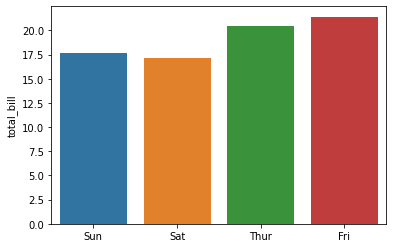

In [34]:
sns.barplot(y=df.groupby(['day'])['total_bill'].apply(lambda x: x.mean()), x=df.day.unique(), data = df)

f. Se vc fosse garçon iria preferir trabalhar em que periodo?

No período noturno, pois as gorjetas são maiores.